In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

# Hamiltonian for an anharmonic oscillator

# looking at phase wrapping 

$$ H(p,x) = p^2/2 + x^2/2 + a x^3 $$
Hamilton's equations give 
$$ \dot x = p $$ 
$$ \dot p = -x - 3 ax^2 $$ 

We use $y = [x,p]$ and $\dot y = [p,-x - 3a x^2]$

In [111]:
# set up equations of motion
# y = [x,p]  dimension 2
# dy/dt = [\dot x, \dot p]
#       = [p, -x - 3 ax^2]  with parameter a

# dy/dt = func(y,t), needed for integrator!
# y[0] = phi and y[1] = p
def func(y,t,a):
    x = y[0]
    return [y[1],-x -3*a*x*x]


# integrate n different initial conditions to time t 
# arguments:
#   y0_arr is an array of initial conditions  
#   a is a parameter of the hamiltonian model
# returns: x_arr,p_arr arrays of integrated points 
def givepoints_arr(y0_arr,tstep,a):
    # set up time array
    if (tstep <5):
        times  = np.array([0,tstep])  # time array
    else:
        times = np.linspace(0,tstep,int(tstep))
    npts = y0_arr.shape[0]  # number of points we want to integrate!
    xarr = np.zeros(npts)  # an array to store final x values
    parr = np.zeros(npts)  # an array to store final p values 
    
    # do the integrations, each particle separately
    for i in range(npts):
        y0 = np.squeeze(y0_arr[i,:])
        y = odeint(func, y0, times, args=(a,))
        xx = np.squeeze(y[:,0])  # is an array of x at the different times
        pp = np.squeeze(y[:,1])  # is an array of momenta at different times
        xarr[i] = xx[-1]  # store the final values
        parr[i] = pp[-1]
   
    return xarr,parr


# create some initial conditions
# in phase space
# fill rectangle of size epsilon centered at x=x0,p=0
# npts is the number of points we want
def fill_y0_arr(x0,epsilonx,epsilonp,npts):
    # create random particles within a unit circle 
    x = np.random.uniform(low=0,high=1,size=npts)-0.5  # uniform distribution 
    y = np.random.uniform(low=0,high=1,size=npts)-0.5
    xarr = x0 + epsilonx*x  
    parr = epsilonp*y
    y0_arr = np.zeros((npts,2))
    y0_arr[:,0] = xarr
    y0_arr[:,1] = parr
    return y0_arr
    

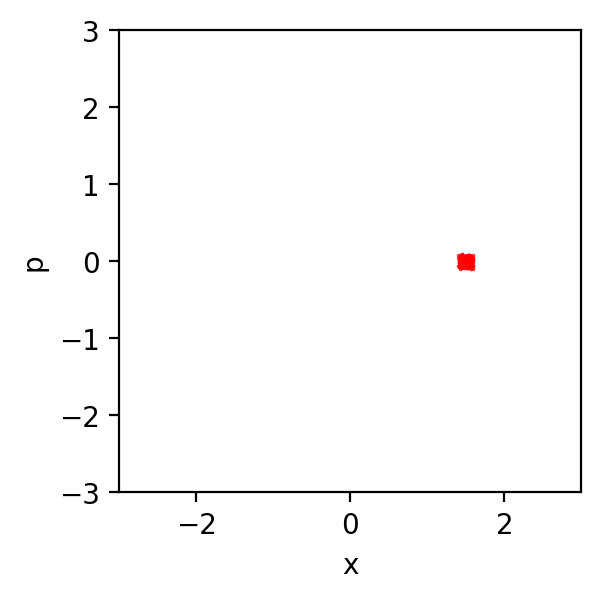

In [104]:
y0_arr = fill_y0_arr(1.5,0.2,0.2,200)
fig,ax = plt.subplots(1,1,figsize=(3,3),dpi=200)
xmax = 3
ax.set_xlim([-xmax,xmax])
ax.set_ylim([-xmax,xmax])
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('p')
ax.plot(np.squeeze(y0_arr[:,0]),np.squeeze(y0_arr[:,1]),'r.',ms=0.5)
#generated pointes look good!

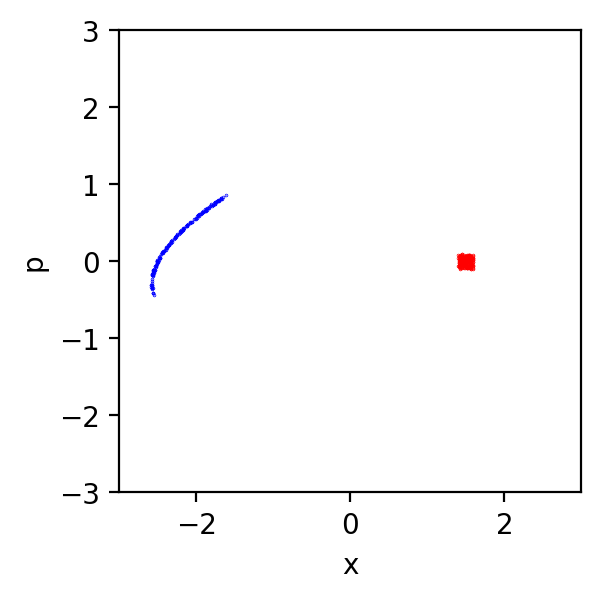

In [113]:
a = 0.1

#y0_arr = fill_y0_arr(1,0.3,100)
fig,ax = plt.subplots(1,1,figsize=(3,3),dpi=200)

ax.set_xlim([-xmax,xmax])
ax.set_ylim([-xmax,xmax])
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('p')
x0_arr = np.squeeze(y0_arr[:,0]); p0_arr = np.squeeze(y0_arr[:,1])
ax.plot(x0_arr,p0_arr,'r.',ms=0.5)  #plot initial conditions

tstep = 12; 
xarr,parr= givepoints_arr(y0_arr,tstep,a)  #integrate model
ax.plot(xarr,parr,'b.',ms=0.5)  # plot final points


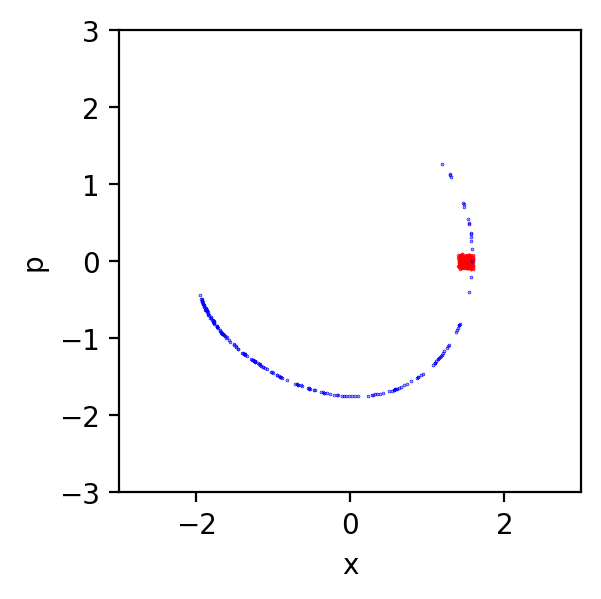

In [114]:
a = 0.1

#y0_arr = fill_y0_arr(1,0.3,100)
fig,ax = plt.subplots(1,1,figsize=(3,3),dpi=200)

ax.set_xlim([-xmax,xmax])
ax.set_ylim([-xmax,xmax])
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('p')
x0_arr = np.squeeze(y0_arr[:,0]); p0_arr = np.squeeze(y0_arr[:,1])
ax.plot(x0_arr,p0_arr,'r.',ms=0.5)  #plot initial conditions

tstep = 25; 
xarr,parr= givepoints_arr(y0_arr,tstep,a)  #integrate model
ax.plot(xarr,parr,'b.',ms=0.5)  # plot final points


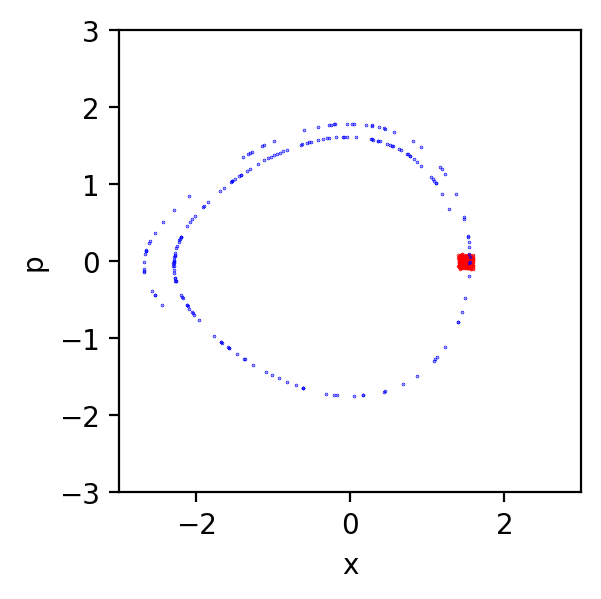

In [116]:
a = 0.1

#y0_arr = fill_y0_arr(1,0.3,100)
fig,ax = plt.subplots(1,1,figsize=(3,3),dpi=200)

ax.set_xlim([-xmax,xmax])
ax.set_ylim([-xmax,xmax])
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('p')
x0_arr = np.squeeze(y0_arr[:,0]); p0_arr = np.squeeze(y0_arr[:,1])
ax.plot(x0_arr,p0_arr,'r.',ms=0.5)  #plot initial conditions

tstep = 80; 
xarr,parr= givepoints_arr(y0_arr,tstep,a)  #integrate model
ax.plot(xarr,parr,'b.',ms=0.5)  # plot final points
